In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

color_pal =  sns.color_palette()

dataroot = '../WaterLevelPredction_SelectingModel//Data/'

In [15]:
df=pd.read_csv(dataroot + 'WaterLevelData_ver3.csv')
df.info

<bound method DataFrame.info of       year  month  day  water_level  hour  precipitation sluice_status
0     2017      1    1       479.40     7            NaN         close
1     2017      1    1       479.38    19            NaN         close
2     2017      1    2       479.37     7            NaN          open
3     2017      1    2       479.36    19            NaN          open
4     2017      1    3       479.36     7            NaN          open
...    ...    ...  ...          ...   ...            ...           ...
3640  2021     12   29       475.18    19            NaN         close
3641  2021     12   30       475.18     7            NaN         close
3642  2021     12   30       475.17    19            NaN         close
3643  2021     12   31       475.17     7            NaN         close
3644  2021     12   31       475.17    19            NaN         close

[3645 rows x 7 columns]>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3645 entries, 0 to 3644
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           3645 non-null   int64  
 1   month          3645 non-null   int64  
 2   day            3645 non-null   int64  
 3   water_level    3645 non-null   float64
 4   hour           3645 non-null   int64  
 5   precipitation  542 non-null    float64
 6   sluice_status  3645 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 199.5+ KB


In [17]:
df.precipitation.fillna(0, inplace=True)

In [18]:
le = LabelEncoder()
df['sluice_status'] = le.fit_transform(df['sluice_status'])

In [19]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [20]:
df.tail(10)

,year,month,day,water_level,hour,precipitation,sluice_status,date
3635,2021,12,27,475.18,7,0.0,0,2021-12-27
3636,2021,12,27,475.18,19,0.0,0,2021-12-27
3637,2021,12,28,475.18,7,0.0,0,2021-12-28
3638,2021,12,28,475.18,19,0.0,0,2021-12-28
3639,2021,12,29,475.18,7,0.0,0,2021-12-29
3640,2021,12,29,475.18,19,0.0,0,2021-12-29
3641,2021,12,30,475.18,7,0.0,0,2021-12-30
3642,2021,12,30,475.17,19,0.0,0,2021-12-30
3643,2021,12,31,475.17,7,0.0,0,2021-12-31
3644,2021,12,31,475.17,19,0.0,0,2021-12-31


In [21]:
df.to_pickle(dataroot + 'finaldata.pkl')

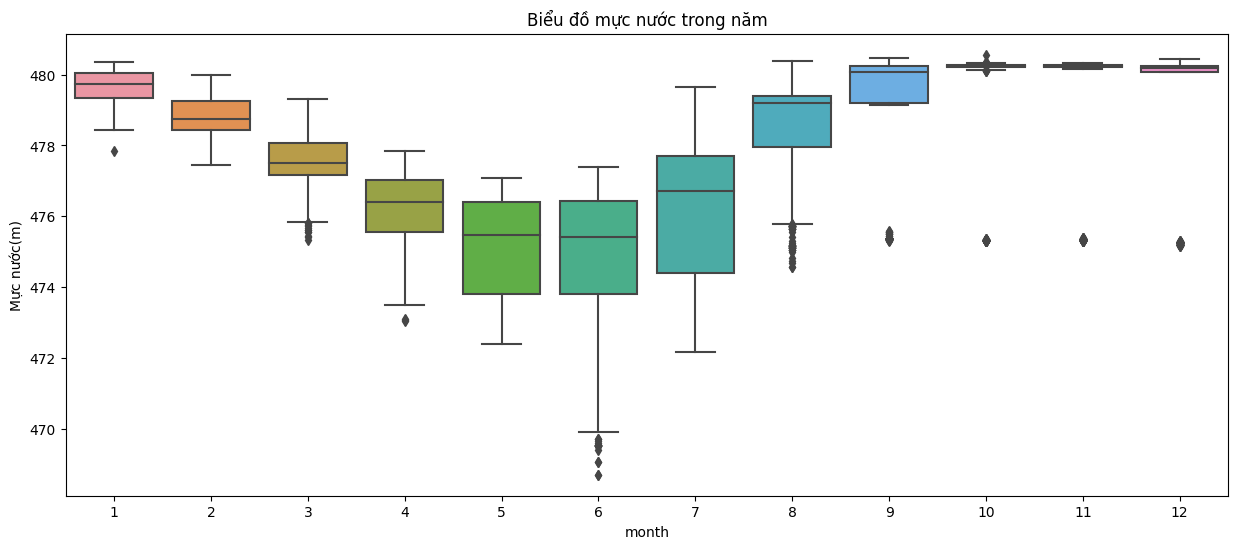

In [22]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='water_level', data=df)
plt.title('Biểu đồ mực nước trong năm')
plt.ylabel('Mực nước(m)')
plt.show()


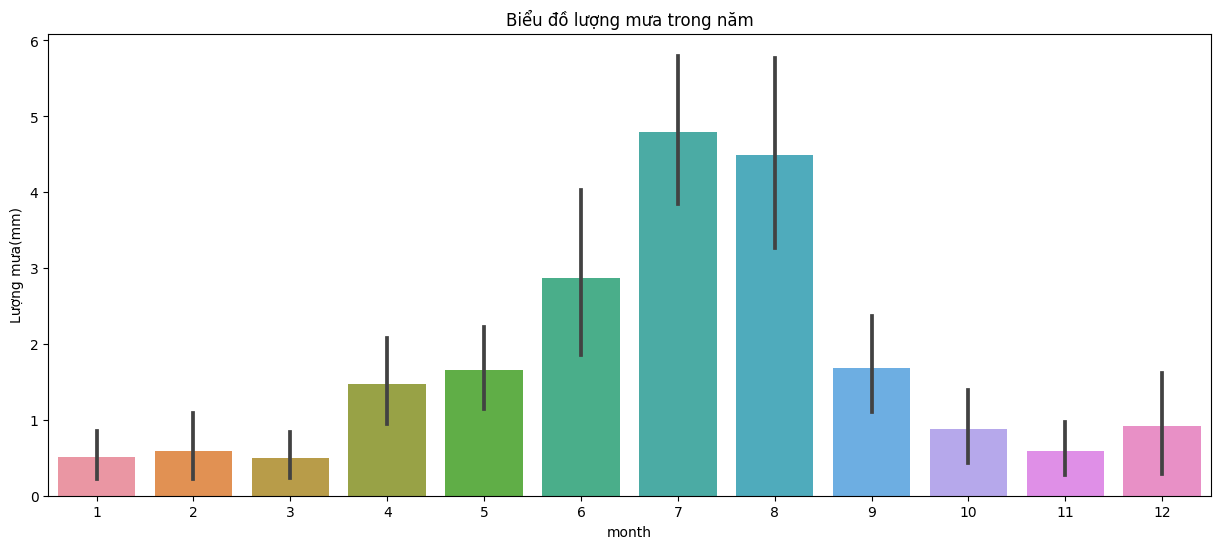

In [23]:
plt.figure(figsize=(15, 6))
sns.barplot(x='month', y='precipitation', data=df)
plt.title('Biểu đồ lượng mưa trong năm')
plt.ylabel('Lượng mưa(mm)')
plt.show()

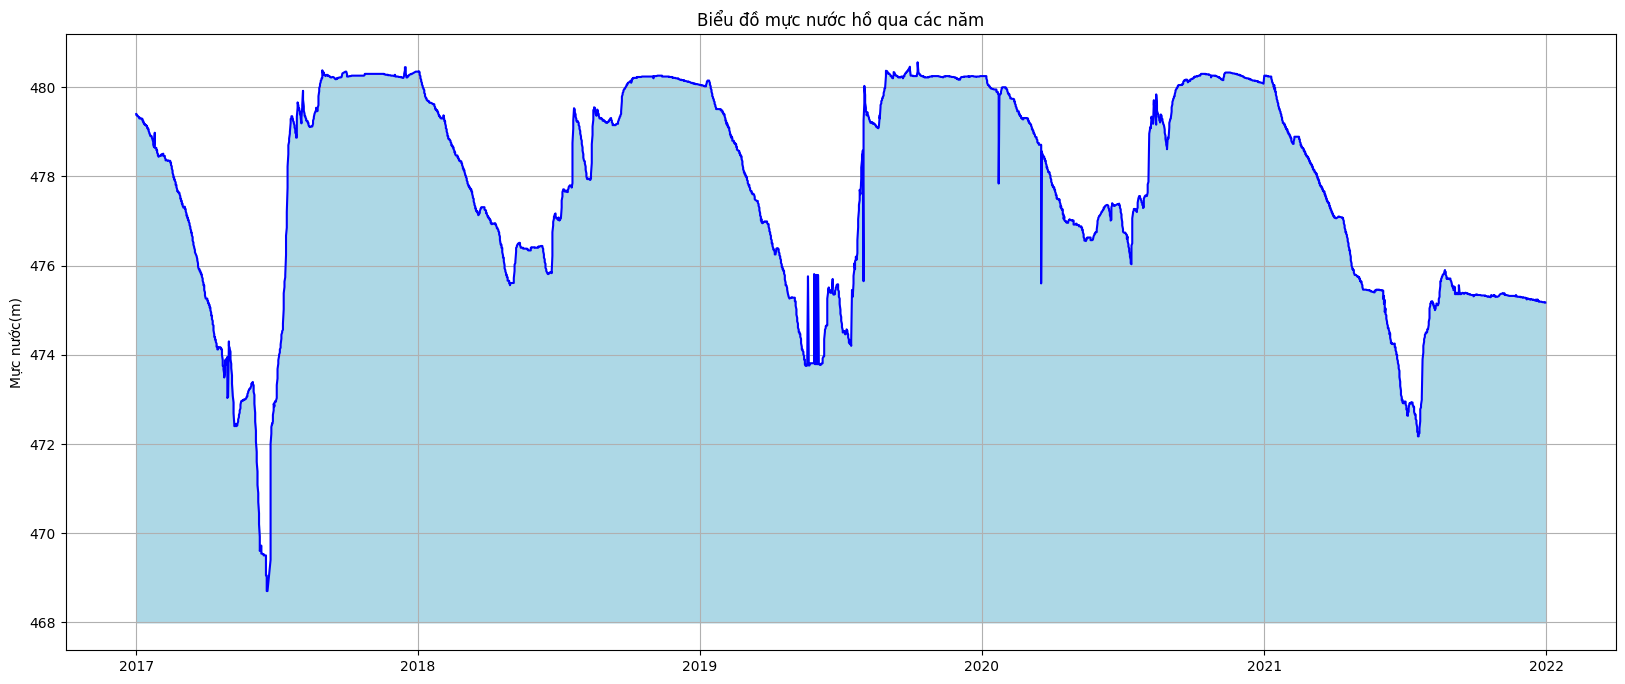

In [24]:
plt.figure(figsize=(20,8))

plt.title('Biểu đồ mực nước hồ qua các năm')

plt.plot(df['date'], df['water_level'], color='blue')

plt.fill_between(df['date'], 468, df['water_level'],color='lightblue')

plt.ylabel('Mực nước(m)')

plt.grid()
plt.show()

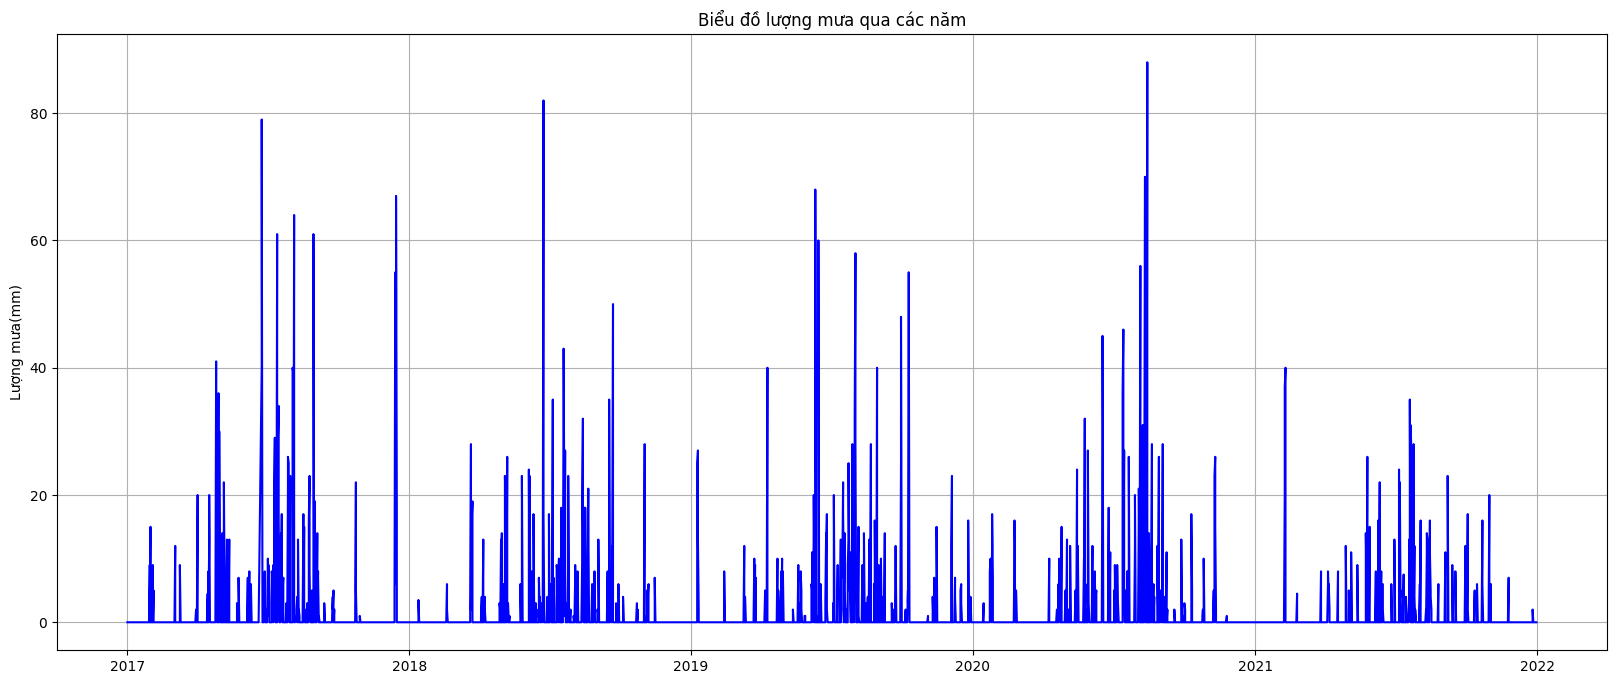

In [25]:
plt.figure(figsize=(20,8))

plt.title('Biểu đồ lượng mưa qua các năm')

plt.plot(df['date'], df['precipitation'], color='blue')

plt.ylabel('Lượng mưa(mm)')

plt.grid()
plt.show()

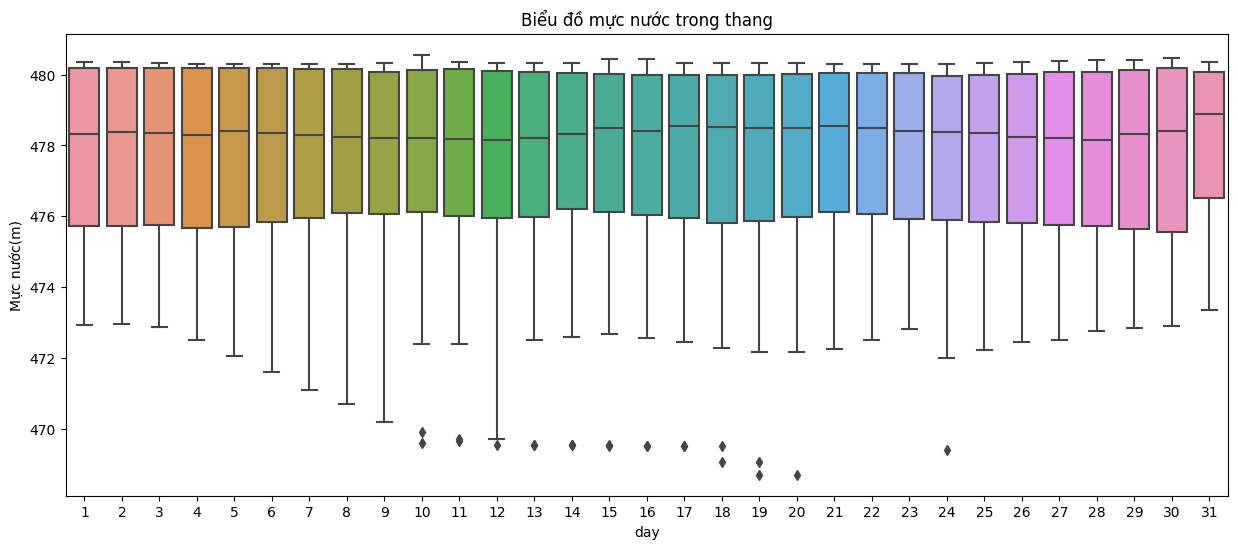

In [26]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='day', y='water_level', data=df)
plt.title('Biểu đồ mực nước trong thang')
plt.ylabel('Mực nước(m)')
plt.show()